# Loan application status prediction

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('loan application status prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head

<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

In [5]:
df.shape

(614, 13)

There are 614 rows and 13 columns.

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Dataframe description:

The dataset contains data of the customer.On the basis of the data we need to make certain changes and predict the status of the loan application form.The data set contains the data likeLoan_ID', 'Gender', 'Married', 'Dependents', 'Education',
'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'.

In the above dataframe our target variable is 'LoanStatus'

It is a classification problem.
      

# Checking the data types of the columns

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Loan_status is our target variable which has classes it has to be encoded.

# Checking null values

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are 13 null values in'Gender'column,3 null values in 'Married'column,15 null values in 'Dependents' column,32 null values in'Self_Employed'column,22 null values in'LoanAmount'column,14 nullvalues in'Loan_Amount_Term'columnand 50 null values in 'Credit_History'column.

All these null values have to be treated.

# Heatmap for the representation of null values

<AxesSubplot:>

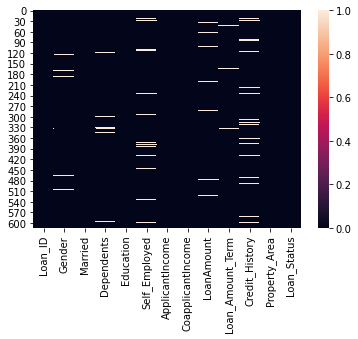

In [9]:
sns.heatmap(df.isnull())

The heat map shows the presence of 13 null values in'Gender'column,3 null values in 'Married'column,15 null values in 'Dependents' column,32 null values in'Self_Employed'column,22 null values in'LoanAmount'column,14 nullvalues in'Loan_Amount_Term'columnand 50 null values in 'Credit_History'column.

In [10]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

There are 2 unique classes in df['Loan_Status']

In [11]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Class imbalance exists between the 2 clasess of our target variable.

# Making dataframe for the nominal data: 

In [61]:
df_visualization_nominal=df[['Gender','Married','Self_Employed','Credit_History','Loan_Status']].copy()

In [62]:
df_visualization_nominal.columns

Index(['Gender', 'Married', 'Self_Employed', 'Credit_History', 'Loan_Status'], dtype='object')

# Visualiztion of the data

For the nominal categorical categorical data we will use the countplot as it will give the frequency of the classes of the columns.

Male      489
Female    112
Name: Gender, dtype: int64


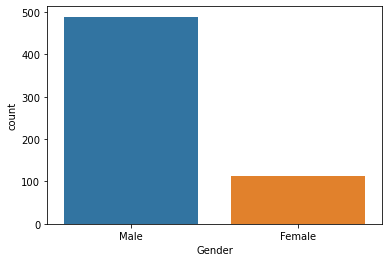

In [63]:
ax=sns.countplot(x='Gender',data=df_visualization_nominal)
print(df_visualization_nominal['Gender'].value_counts())

From the above observations the total number of males is 489 andthe number of females is 112. 

Yes    398
No     213
Name: Married, dtype: int64


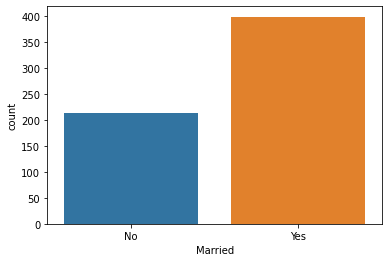

In [64]:
ax=sns.countplot(x='Married',data=df_visualization_nominal)
print(df_visualization_nominal['Married'].value_counts())

From the above observations the total number of married persons is 398 and  the number of unmarried is 213.

No     500
Yes     82
Name: Self_Employed, dtype: int64


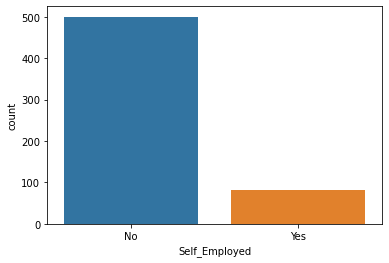

In [65]:
x=sns.countplot(x='Self_Employed',data=df_visualization_nominal)
print(df_visualization_nominal['Self_Employed'].value_counts())

From the above observations the total number of self-Employed is 82 and the number of non self-employed is 500.

1.0    475
0.0     89
Name: Credit_History, dtype: int64


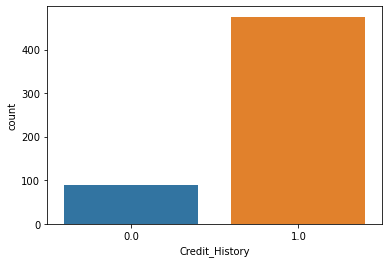

In [66]:
x=sns.countplot(x='Credit_History',data=df_visualization_nominal)
print(df_visualization_nominal['Credit_History'].value_counts())

In [ ]:
From the above observations the total number of ppl who have credit history is 89 and the number of people with no credit history is 475.

1    422
0    192
Name: Loan_Status, dtype: int64


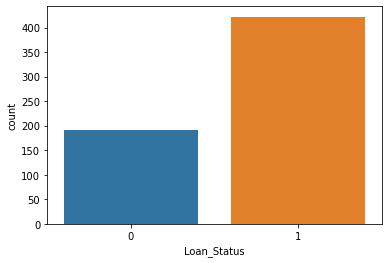

In [67]:
x=sns.countplot(x='Loan_Status',data=df_visualization_nominal)
print(df_visualization_nominal['Loan_Status'].value_counts())

From the above graph the no of ppl who have taken loan are 422 and who have not taken is 192

From the above plots ,we can conclude that 80%of the applicants aremales,65%of the applicants are married 15% are self-employedand 85% applicants have repaid their debts.

For the ordinal data we will use box plot.

In [69]:
df_visualization_ordinal=df[['Dependents','Education','Property_Area']].copy()

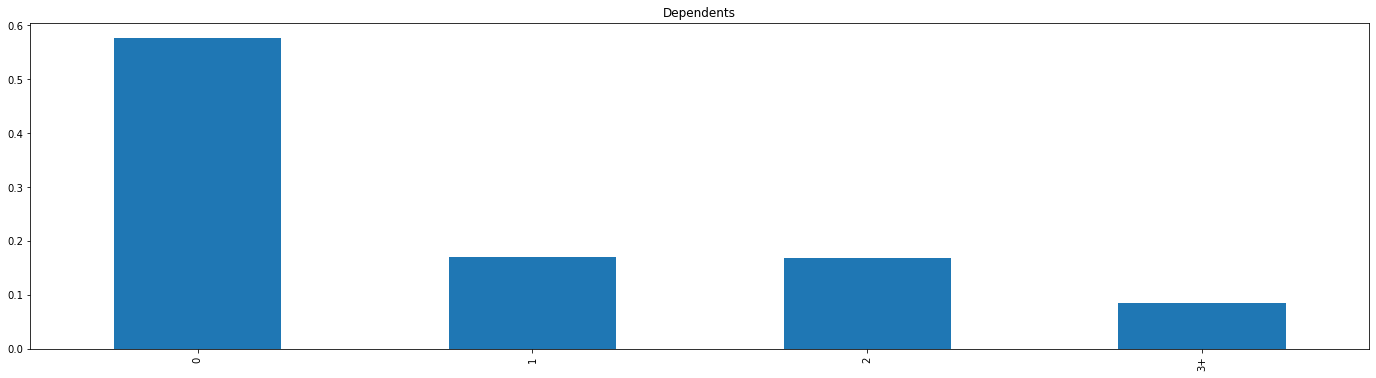

In [71]:
df_visualization_ordinal['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.show()

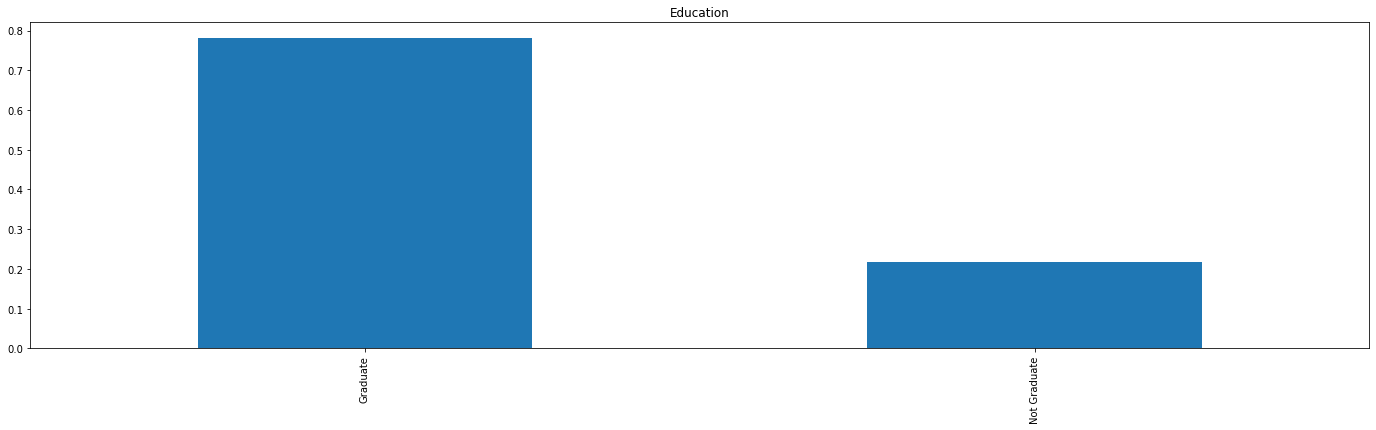

In [72]:
df_visualization_ordinal['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')
plt.show()

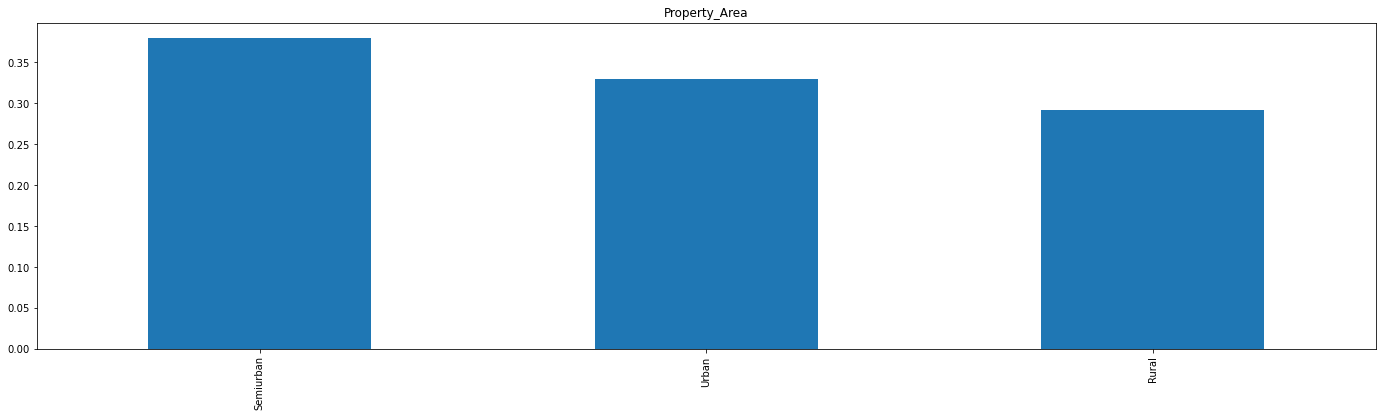

In [73]:
df_visualization_ordinal['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Property_Area')
plt.show()

From the above graphical representationwe can conclude;
most of the applicants do not have dependents,80%are graduates and mostof the applicants are from semi urban area.

# Bivariate and univariate analysis

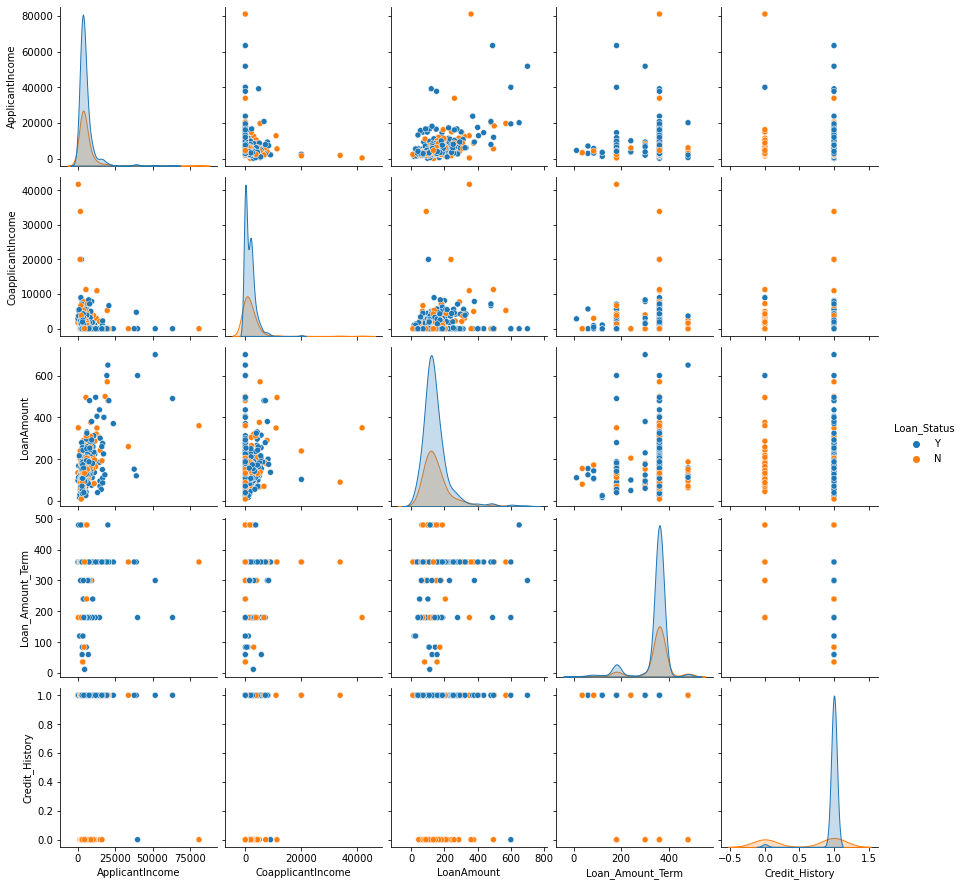

In [15]:
sns.pairplot(df,hue='Loan_Status')

Pair plot gives us a lot of information.Data is normally distributed in all the two classes.The pairplot also gives us information as to how our target variable'Loan_Status'inteacts with the other columns.

# Categorical independent variable vs target

Lets find the relationship using stacked bar plot which weill give us the propotion of approvrd and unapproved loans.

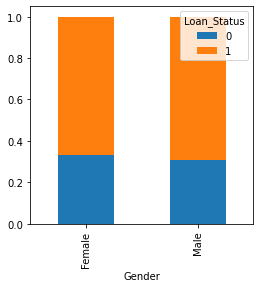

In [75]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

we can see that the proportion of male and females is more or less the same forboth approved and un approved loans.

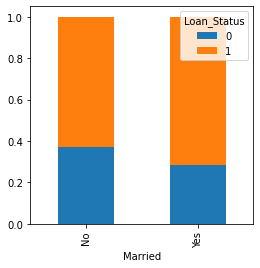

In [77]:
Married=pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

we can see that the proportion of married applicants is higher.

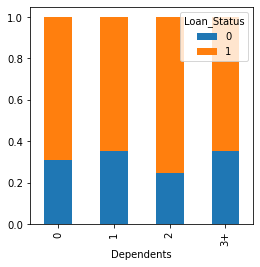

In [79]:
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

distribution of applicantswith 1 or 3 dependents is similar across both the categories of Loan_Status.

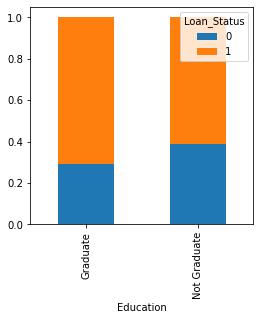

In [80]:
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

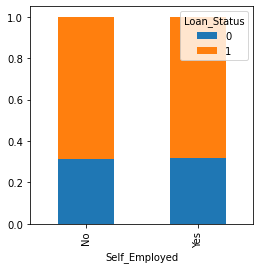

In [81]:
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

we cannot intepret much from the  above graph.

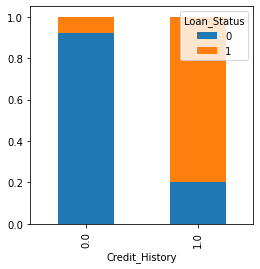

In [82]:
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

people with credit history are more likely to gettgeirloans approved.

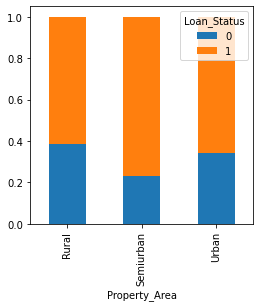

In [83]:
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

proportion of loans getting approved in semi-urban areas is higher than rural orurban areas.

# Correlation:

In [16]:
cor=df.corr()

In [17]:
cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

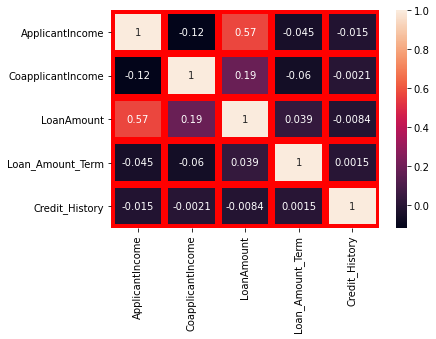

In [18]:
sns.heatmap(cor,annot=True,linewidths=6,linecolor='r')

In the above heatmap we can see that our target variable is not present since string is present inour target variable and hence has to be converetd to numeric.

# Encoding of our target variabe using LabelEncoder

In [19]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Loan_Status']=LE.fit_transform(df['Loan_Status'])

In [20]:
df['Loan_Status'].unique()

array([1, 0])

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


we can see that our target variable values have been changed.

From the heatmap we can see that Credit_History shows a strong relationship with our target variable.

# Oversampling

In [26]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Loan_Status']=LE.fit_transform(df['Loan_Status'])

In [27]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [28]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
SM=SMOTE()
x,y =SM.fit_resample(x,y)

ValueError: could not convert string to float: 'LP001002'

# Missing value treatment

In [85]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

For numerical variables we can use mean or median
For categorical variables we can use mode

In [87]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)






Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [90]:
df['Loan_Amount_Term'].value_counts()

5.886104    512
5.192957     44
6.173786     15
5.703782     13
4.430817      4
5.480639      4
4.787492      3
3.583519      2
4.094345      2
2.484907      1
Name: Loan_Amount_Term, dtype: int64

360 is repeating the most.

In [91]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [93]:
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0],inplace=True)

In [94]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outliers

ApplicantIncome         AxesSubplot(0.125,0.125;0.065678x0.755)
CoapplicantIncome    AxesSubplot(0.203814,0.125;0.065678x0.755)
LoanAmount           AxesSubplot(0.282627,0.125;0.065678x0.755)
Loan_Amount_Term     AxesSubplot(0.361441,0.125;0.065678x0.755)
Credit_History       AxesSubplot(0.440254,0.125;0.065678x0.755)
Loan_Status          AxesSubplot(0.519068,0.125;0.065678x0.755)
dtype: object

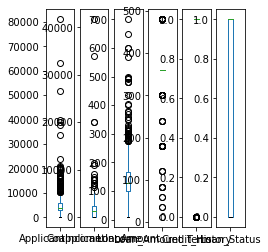

In [31]:
df.plot(kind='box',subplots=True,layout=(1,10))

from the above graph we can see the presence of outliers in 'ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'.Lets plot them individually

<AxesSubplot:>

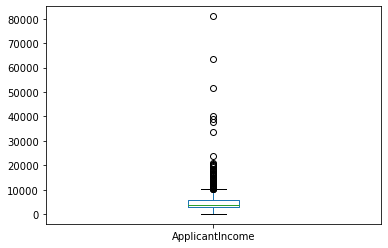

In [32]:
df['ApplicantIncome'].plot.box()

the graph shows the presence of outliers.

<AxesSubplot:>

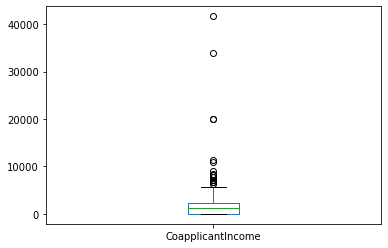

In [33]:
df['CoapplicantIncome'].plot.box()

the graph shows the presence of outliers.

<AxesSubplot:>

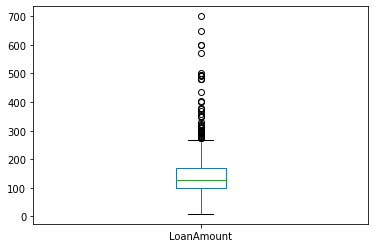

In [34]:
df['LoanAmount'].plot.box()

the graph shows the presence of outliers.

<AxesSubplot:>

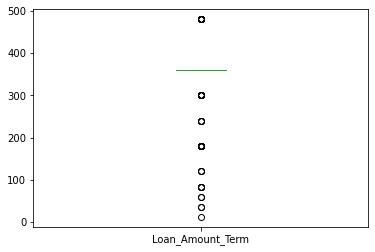

In [35]:
df['Loan_Amount_Term'].plot.box()

the graph shows the presence of outliers.

<AxesSubplot:>

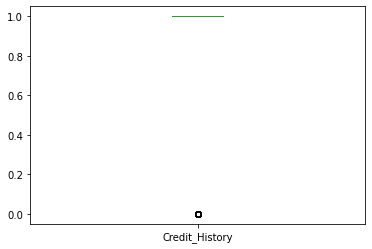

In [36]:
df['Credit_History'].plot.box()

only one outlier is present.

<AxesSubplot:>

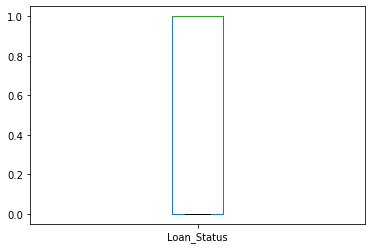

In [37]:
df['Loan_Status'].plot.box()

no outliers are present in this column.

# Removal of ouliers

<AxesSubplot:>

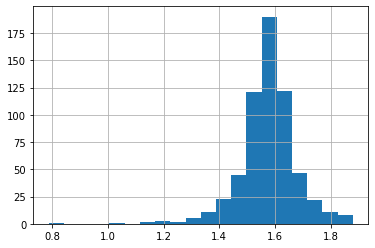

In [97]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)


Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.


# Skewness

In [98]:
df.skew()

ApplicantIncome      0.479580
CoapplicantIncome    7.491531
LoanAmount          -0.181227
Loan_Amount_Term    -4.869020
Credit_History      -2.021971
Loan_Status         -0.809998
LoanAmount_log      -1.138119
dtype: float64

Graphical Representation of skewness

<AxesSubplot:ylabel='Frequency'>

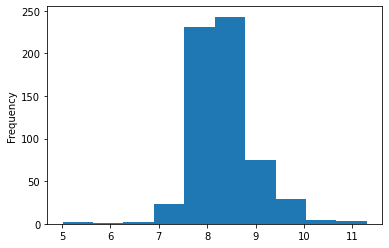

In [99]:
df['ApplicantIncome'].plot.hist()

skewness is present

<AxesSubplot:ylabel='Frequency'>

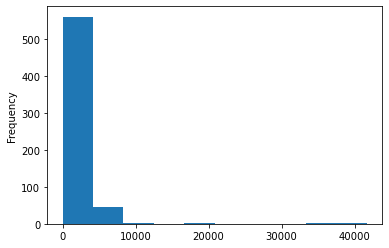

In [100]:
df['CoapplicantIncome'].plot.hist()

skewness is present

<AxesSubplot:ylabel='Frequency'>

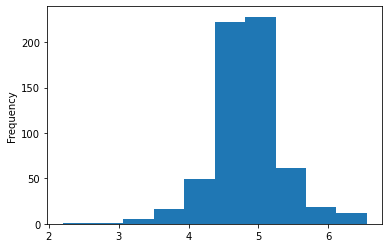

In [101]:
df['LoanAmount'].plot.hist()

skewness is present

<AxesSubplot:ylabel='Frequency'>

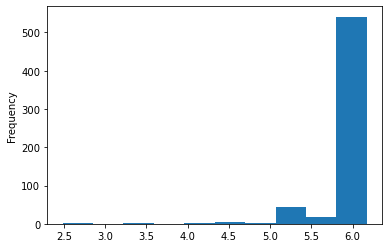

In [102]:
df['Loan_Amount_Term'].plot.hist()

skewness is present

<AxesSubplot:ylabel='Frequency'>

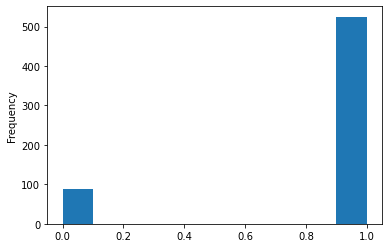

In [103]:
df['Credit_History'].plot.hist()

skewness is present

<AxesSubplot:ylabel='Frequency'>

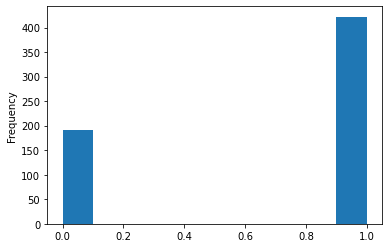

In [104]:
df['Loan_Status'].plot.hist()

skewness is present

# Normal Distribution Curve:

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

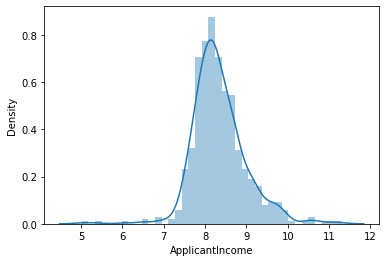

In [105]:
sns.distplot(df['ApplicantIncome'])

data is not normally distributed as we can see the building blocks lying outside the curve

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

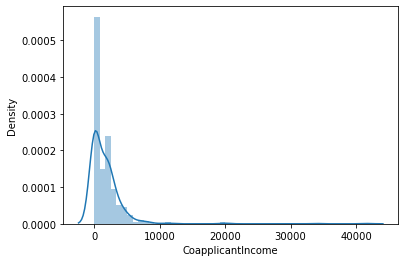

In [106]:
sns.distplot(df['CoapplicantIncome'])

data is not normally distributed as we can see the building blocks lying outside the curve

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

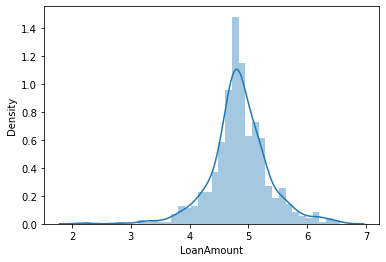

In [107]:
sns.distplot(df['LoanAmount'])

data is not normally distributed as we can see the building blocks lying outside the curve

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

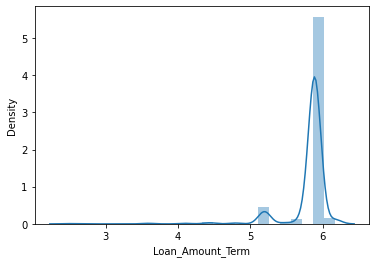

In [108]:
sns.distplot(df['Loan_Amount_Term'])

data is not normally distributed as we can see the building blocks lying outside the curve

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

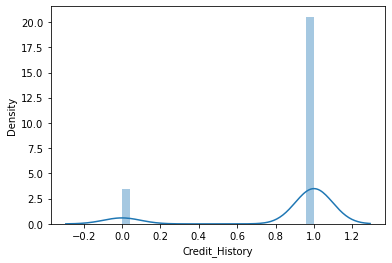

In [109]:
sns.distplot(df['Credit_History'])

data is not normally distributed as we can see the building blocks lying outside the curve


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

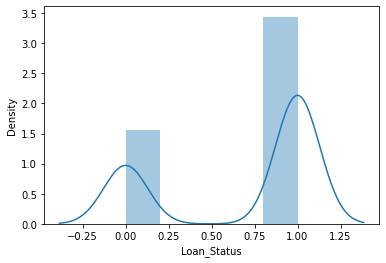

In [110]:
sns.distplot(df['Loan_Status'])

data is not normally distributed as we can see the building blocks lying outside the curve

All the above data indicate that the data is skewed

Removal of skewness:

In [111]:
from scipy.stats import boxcox
#0--->log transform
#.5--->square root transform
df['ApplicantIncome']=boxcox(df['ApplicantIncome'],0)

<AxesSubplot:ylabel='Frequency'>

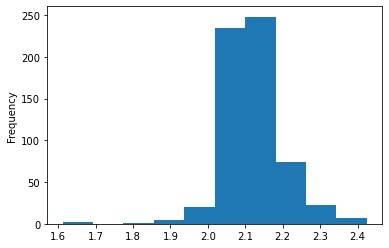

In [112]:
df['ApplicantIncome'].plot.hist()

In [113]:
df['CoapplicantIncome']=boxcox(df['CoapplicantIncome'],.5)

ValueError: Data must be positive.

skewness cannot be removed as data must be positive

In [114]:
df['LoanAmount']=boxcox(df['LoanAmount'],0)

<AxesSubplot:ylabel='Frequency'>

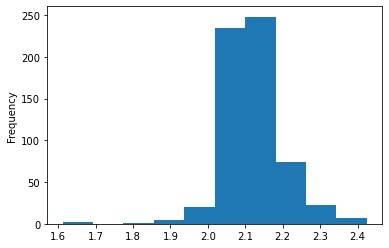

In [115]:
df['ApplicantIncome'].plot.hist()

In [116]:
df['Loan_Amount_Term']=boxcox(df['Loan_Amount_Term'],0)

<AxesSubplot:ylabel='Frequency'>

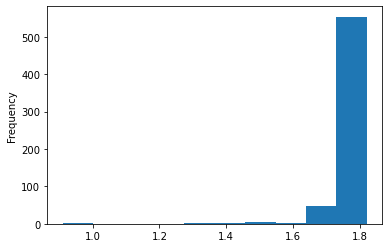

In [117]:
df['Loan_Amount_Term'].plot.hist()

In [118]:
df['Credit_History']=boxcox(df['Credit_History'],0)

ValueError: Data must be positive.

skewness cannot be removed as data must be positive.

In [119]:
df['Loan_Status']=boxcox(df['Loan_Status'],0)

ValueError: Data must be positive.

skewness cannot be removed as data must be positive. 

# Model Building

In [151]:
X=df.drop('Loan_Status',axis=1)
y=df.Loan_Status


In [153]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [155]:
pred_test=model.predict(x_test)
accuracy_score(y_test,pred_test)

0.8486486486486486

We have identified 85% loan status correctly 

# LogisticRegression using k-folds cross validation

In [157]:
from sklearn.model_selection import StratifiedKFold

In [162]:
i=1
mean=0
kf=StratifiedKFold(n_splits=5,random_state=i)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=LogisticRegression(random_state=i)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean+=score
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]
    
print('\n Mean Validation Accuracy',mean/(i-1))

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.